In [16]:
import dgl as dgl
import torch
import networkx as nx
import WLColorRefinement as wlc
import create_reduced_graph as crg
import pickle

In [17]:
source_nodes = torch.tensor([0,1,1,2,2,3,2,4,5,6,1,6,6,7,7,8,4,7])
dest_nodes =   torch.tensor([1,0,2,1,3,2,4,2,6,5,6,1,7,6,8,7,7,4])
test_case = dgl.graph((source_nodes, dest_nodes))


In [18]:
test_case.ndata['feat'] = torch.tensor([0,1,1,0,2,0,1,1,0])

In [19]:
test_case_nx = test_case.to_networkx()

In [20]:
with open('toy_example_original.pkl', 'wb') as f:
    pickle.dump(test_case, f)

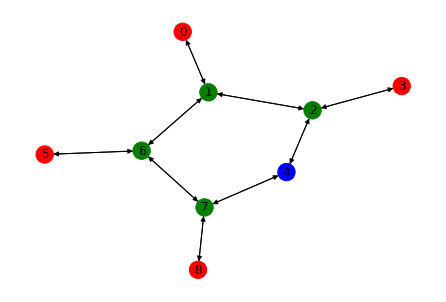

In [21]:
nx.draw(test_case_nx, node_color = ['red', 'green', 'green', 'red', 'blue', 'red', 'green', 'green', 'red'], with_labels = True)

In [22]:
wl_colored_test_case = wlc.wl_coloring(test_case)


In [23]:
nx_wl_colored_test_case = wl_colored_test_case.to_networkx()

In [24]:
wl_colored_test_case.ndata['feat']

tensor([45, 47, 48, 46, 49, 45, 47, 48, 46])

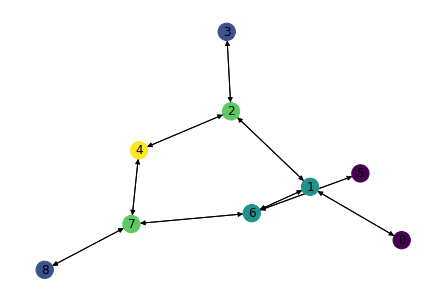

In [25]:
nx.draw(nx_wl_colored_test_case, node_color = wl_colored_test_case.ndata['feat'], with_labels = True)

In [26]:
wl_colored_test_case.ndata['original_feat'] = torch.tensor([0,1,1,0,2,0,1,1,0])

In [27]:
reduced_test_case = crg.reduced_graph(wl_colored_test_case)
with open('toy_example_reduced.pkl', 'wb') as f:
    pickle.dump(reduced_test_case, f)

In [28]:
nx_reduced_test_case = reduced_test_case.to_networkx()

In [29]:
reduced_test_case

Graph(num_nodes=5, num_edges=13,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)})

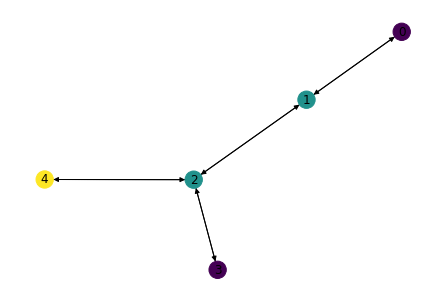

In [30]:
nx.draw(nx_reduced_test_case, node_color = reduced_test_case.ndata['feat'][:,0], with_labels = True)

In [65]:
reduced_test_case.edges()

(tensor([0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4]),
 tensor([1, 0, 0, 2, 1, 1, 3, 4, 2, 2, 3, 2, 4]))

In [66]:
reduced_test_case.edata['feat']

tensor([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0])

In [86]:
reduced_test_case.ndata['feat']

tensor([[0., 2.],
        [1., 2.],
        [1., 2.],
        [0., 2.],
        [2., 1.]])

In [68]:
source_nodes = torch.tensor([0,1,1,2,3,4,2,4,5,6,1,6,6,7,7,8,4,7])
dest_nodes =   torch.tensor([1,0,2,1,4,3,4,2,6,5,6,1,7,6,8,7,7,4])
test_case_2 = dgl.graph((source_nodes, dest_nodes))

In [71]:
test_case_2.ndata['feat'] = torch.tensor([0,1,2,0,1,0,1,1,0])
nx_test_case_2 = test_case_2.to_networkx()

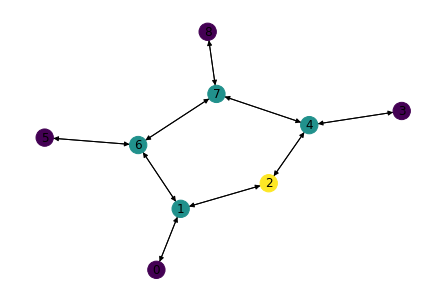

In [72]:
nx.draw(nx_test_case_2, node_color = [0,1,2,0,1,0,1,1,0], with_labels = True)

In [76]:
wl_colored_test_case_2 = wlc.wl_coloring(test_case_2)
nx_wl_colored_test_case_2 = wl_colored_test_case_2.to_networkx()
wl_colored_test_case_2.ndata['feat']

tensor([48, 50, 46, 48, 50, 47, 49, 49, 47])

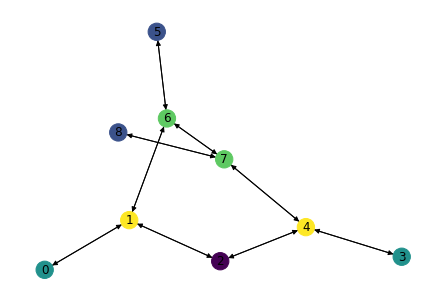

In [77]:
nx.draw(nx_wl_colored_test_case_2, node_color = wl_colored_test_case_2.ndata['feat'], with_labels = True)

In [78]:
wl_colored_test_case_2.ndata['original_feat'] = torch.tensor([0,1,2,0,1,0,1,1,0])

In [79]:
reduced_test_case_2 = crg.reduced_graph(wl_colored_test_case_2)

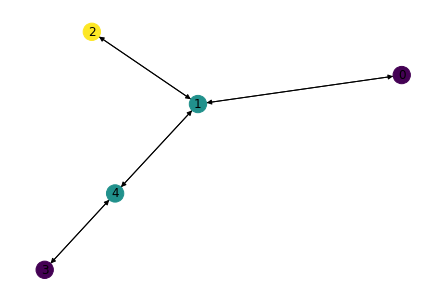

In [83]:
nx_reduced_test_case_2 = reduced_test_case_2.to_networkx()
nx.draw(nx_reduced_test_case_2, node_color = reduced_test_case_2.ndata['feat'][:,0], with_labels = True)

In [81]:
reduced_test_case_2

Graph(num_nodes=5, num_edges=13,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)})

In [84]:
reduced_test_case_2.edata['feat']

tensor([1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1])

In [85]:
reduced_test_case_2.edges()

(tensor([0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4]),
 tensor([1, 0, 0, 2, 4, 1, 1, 2, 4, 3, 1, 3, 4]))

In [87]:
reduced_test_case_2.ndata['feat']

tensor([[0., 2.],
        [1., 2.],
        [2., 1.],
        [0., 2.],
        [1., 2.]])